In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\laptop\Desktop\Disese_predictor\Training.csv")


# Display first few rows
df.head()


,abdominal_pain,chest_pain,chills,cough,difficulty_breathing,dizziness,fatigue,fever,headache,increased_hunger,...,sensitivity_to_light,skin_rash,sneezing,sore_throat,sweating,thirst,vomiting,watery_eyes,weight_loss,prognosis
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Common Cold
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,Diabetes
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,Diabetes
3,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Typhoid
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,Malaria


In [3]:
# Separate features and target
X = df.drop("prognosis", axis=1)
y = df["prognosis"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (5000, 25)
Shape of y: (5000,)


In [4]:
df.isnull().sum().sort_values(ascending=False).head(10)


abdominal_pain          0
chest_pain              0
chills                  0
cough                   0
difficulty_breathing    0
dizziness               0
fatigue                 0
fever                   0
headache                0
increased_hunger        0
dtype: int64

In [5]:
# Prepare data
df = df.fillna(0)  # ✅ fills missing values with 0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)



Training set: (4000, 25) (4000,)
Testing set: (1000, 25) (1000,)


In [6]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

print("✅ Model training complete.")


✅ Model training complete.


In [7]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 99.7 %

Classification Report:
               precision    recall  f1-score   support

     Allergy       1.00      1.00      1.00       100
    COVID-19       1.00      1.00      1.00       108
 Common Cold       1.00      1.00      1.00       101
      Dengue       1.00      0.96      0.98        84
    Diabetes       1.00      1.00      1.00       108
Hypertension       1.00      1.00      1.00       109
     Malaria       1.00      1.00      1.00        94
    Migraine       1.00      1.00      1.00        99
   Pneumonia       1.00      1.00      1.00        84
     Typhoid       0.97      1.00      0.99       113

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [8]:
import joblib

joblib.dump(model, "disease_model.pkl")
print("✅ Model saved as 'disease_model.pkl'")


✅ Model saved as 'disease_model.pkl'


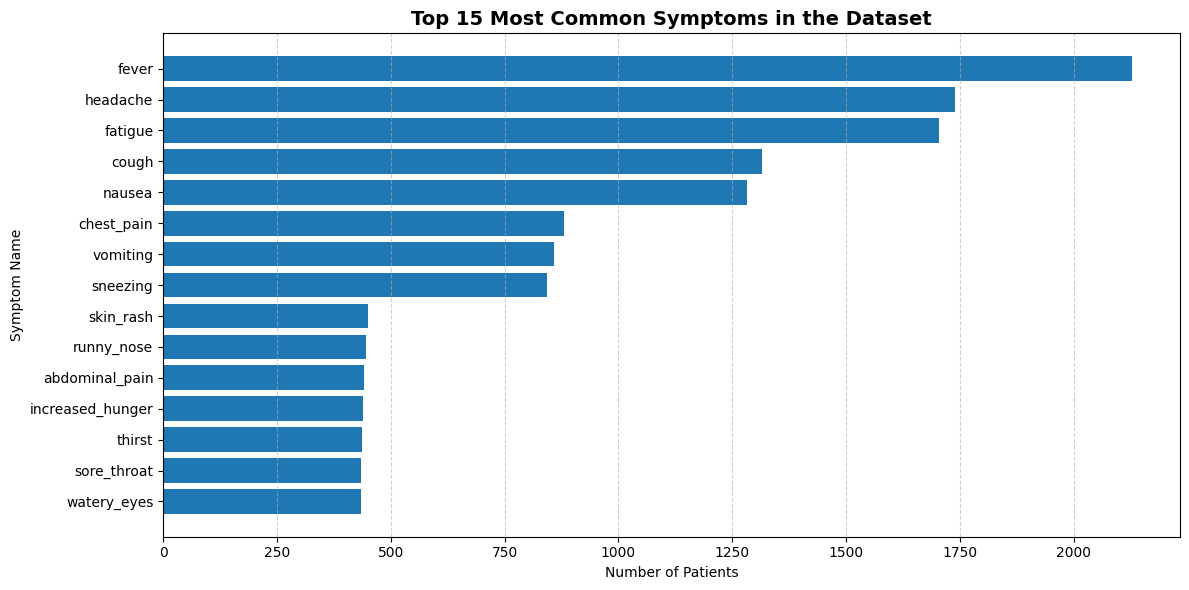

In [9]:
import matplotlib.pyplot as plt

# Count top 15 symptoms
symptom_counts = df.drop("prognosis", axis=1).sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12,6))
plt.barh(symptom_counts.index[::-1], symptom_counts.values[::-1])
plt.xlabel("Number of Patients")
plt.ylabel("Symptom Name")
plt.title("Top 15 Most Common Symptoms in the Dataset", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


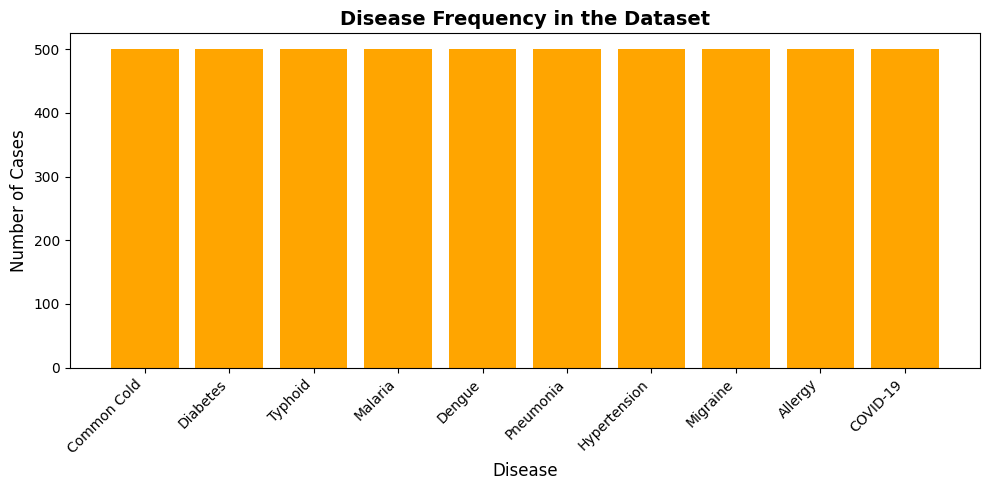

In [11]:
# Disease distribution
disease_counts = df["prognosis"].value_counts()

plt.figure(figsize=(10,5))
plt.bar(disease_counts.index, disease_counts.values, color='orange')
plt.xticks(rotation=45, ha='right')
plt.title("Disease Frequency in the Dataset", fontsize=14, fontweight='bold')
plt.ylabel("Number of Cases", fontsize=12)
plt.xlabel("Disease", fontsize=12)
plt.tight_layout()
plt.show()
